<a href="https://colab.research.google.com/github/tantiboro/diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [39]:
# from google.colab import files
# uploaded = files.upload()

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/New Folder/dataset/diabetes_data.csv.zip', encoding='utf-8')

In [42]:
#df = pd.read_csv('diabetes_data.csv')

In [43]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

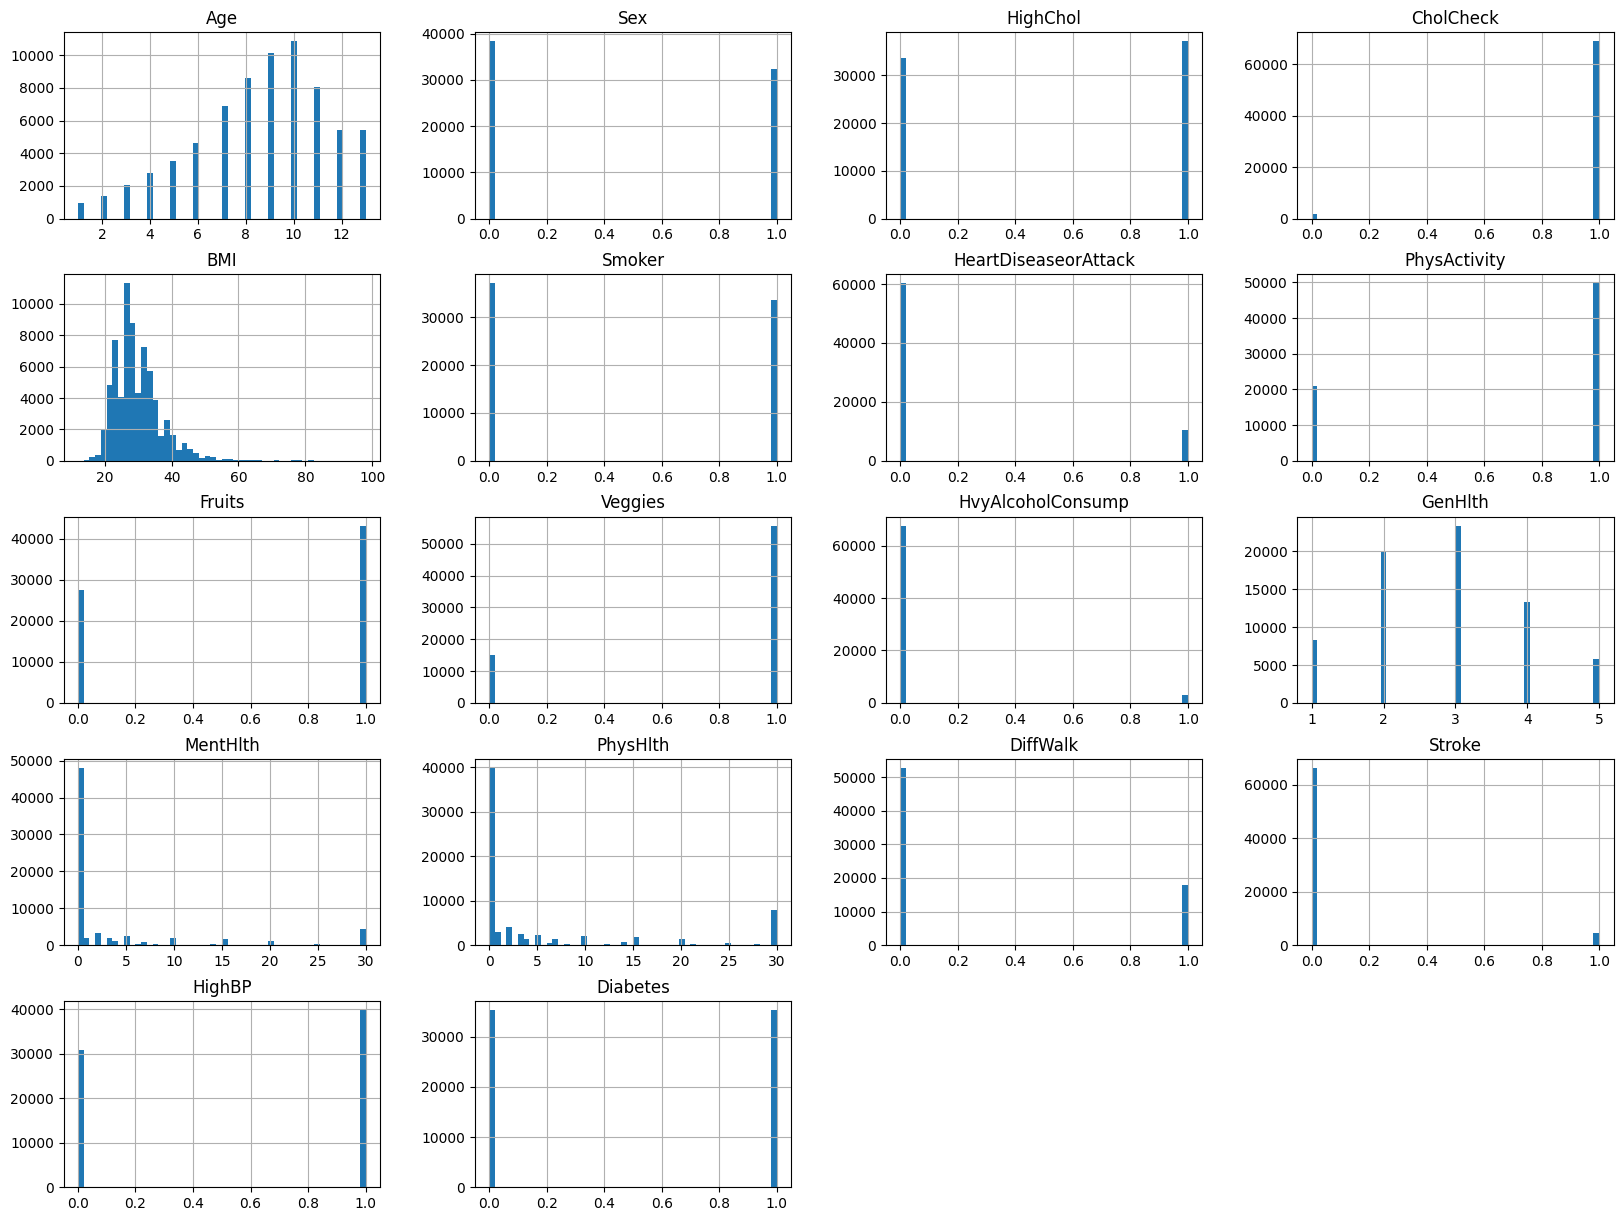

In [45]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [46]:
df.columns = df.columns.str.lower()

In [47]:
df.shape

(70692, 18)

In [48]:
binary_features = ['sex', 'highchol', 'cholcheck', 'smoker', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies', 'hvyalcoholconsump', 'diffwalk', 'stroke', 'highbp' ]
numeric_features = ['age', 'bmi', 'genhlth', 'menthlth', 'physhlth']

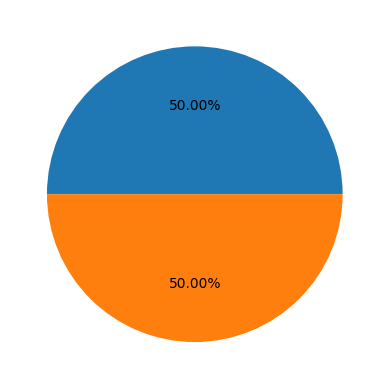

In [49]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(df.diabetes.value_counts(), autopct='%.2f%%')
plt.show()

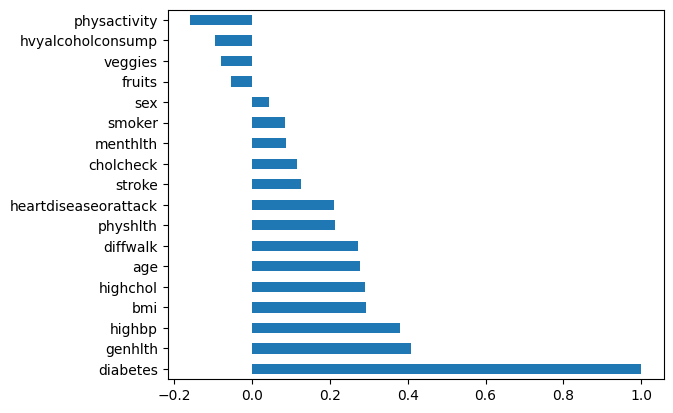

In [50]:
corr_matrix = df.corr()
corr_matrix['diabetes'].sort_values(ascending=False).plot(kind='barh')
plt.show()


In [51]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [119]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
#Dealing with binary columns
binary_pipel = Pipeline(
    [('select_categorial_features', FunctionTransformer(lambda df: df[binary_features])),
      ("fillna", SimpleImputer(strategy='constant', fill_value=False))
      ]
    )
#Dealing with numeric columns
numeric_pipel = Pipeline(
    [
        ('select_numeril_features', FunctionTransformer(lambda x: x[numeric_features], validate=False)),
        #('box-cox', PowerTransformer(method='box-cox', standardize=True)),
        #("scaler", StandardScaler())
        ]
    )


In [120]:
features = FeatureUnion([("binary_pipel", binary_pipel), ("numeric_pipel", numeric_pipel)])


In [54]:
#create feature matrix
X = df.drop('diabetes', axis=1)

In [55]:
#create target vector
y = df.diabetes

In [56]:
# Create logistic regression model
from sklearn import linear_model
logistic = linear_model.LogisticRegression(max_iter=500, solver='liblinear')
#create range of candidate penalty hyperparameter values
penalty = ['l1', 'l2']
#create range of candidateregularization hyperparameter values
C = np.logspace(0, 4, 10)
#create dictionary of hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)
#craete grid search
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# fit grid search
best_model = gridsearch.fit(X, y)
#show the best model
print(best_model.best_estimator_)

LogisticRegression(max_iter=500, solver='liblinear')


Selecting the best models using randomized search

In [57]:
# #Create logistic regression classifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform
# logistic = LogisticRegression(max_iter=500, solver='libelinear')
# #create range of candidate regularization penalty hyperparameter values
# penalty = ['l1', 'l2']
# #create distribution of candidates regularization hyperparameter values
# C = uniform(loc=0, scale=4)
# #create dictionary of hyperparameter candidates
# hyperparameters = dict(C=C, penalty=penalty)
# #craete grid search
# randomizedsearch = RandomizedSearchCV(logistic, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
# # fit grid search
# best_model = randomizedsearch.fit(features, target)
# #show the best model
# print(best_model.best_estimator_)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [59]:
#Create the pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
#Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [{"classifier":[LogisticRegression(max_iter=500, solver='liblinear')],
                "classifier__penalty": ['l1', 'l2'],
                "classifier__C": np.logspace(0,4, 10)},
{"classifier": [RandomForestClassifier()],
"classifier__n_estimators": [10, 100, 1000],
"classifier__max_features": [1, 2, 3]}]
#Create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0)
# Fit grid search
best_model = gridsearch.fit(X, y)
# print best model
print(best_model.best_estimator_)

Pipeline(steps=[('classifier',
                 LogisticRegression(max_iter=500, solver='liblinear'))])


In [60]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [61]:
#Create a preprocessing object that includes StandardScaler features and PCA
preprocess = FeatureUnion([("std", StandardScaler()),("pca", PCA())])
#create a pipeline
pipe = Pipeline([("preprocess", preprocess),
                ("classifier", LogisticRegression(max_iter=1000, solver='liblinear'))])
#create space of candidate values
search_space = [{"preprocess__pca__n_components": [1, 2, 3],
                "classifier__penalty": ['l1', 'l2'],
                "classifier__C": np.logspace(0, 4, 10)}]
#create grid search
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs=-1)
#fit grid search
best_model = clf.fit(X, y)

#Print best model
print(best_model.best_estimator_)

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=3))])),
                ('classifier',
                 LogisticRegression(C=2.7825594022071245, max_iter=1000,
                                    penalty='l1', solver='liblinear'))])


In [62]:
#Creating a baseline for classification model
from sklearn.dummy import DummyClassifier
#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
# Create a dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)
#train model
dummy.fit(X_train, y_train)

DummyClassifier(random_state=1, strategy='uniform')

In [63]:
#get accuracy
dummy.score(X_test, y_test)

0.49957562383296555

In [64]:
# Create standardizer
standardizer = StandardScaler()
scaler = MinMaxScaler()

In [65]:
# Create the Logistic regression object
logit = LogisticRegression()

In [66]:
# Create a pipeline that standardizes, then runs Logistics regression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
#pipeline = make_pipeline(standardizer, logit)
pipeline = make_pipeline(standardizer, logit)

In [67]:
# Create k-fold cross-validation
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [68]:
# conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, #Pipeline
                             X, # Features matrix
                             y, # target vector
                             cv=kf, # Performance metric
                             scoring= 'accuracy', # Loss Function
                             n_jobs=-1 # Use all CPUcores

)

In [69]:
#Calculate mean
cv_results.mean()

0.7473546755651613

In [70]:
#import the library
from sklearn.model_selection import train_test_split

In [71]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [72]:
#Fit standardizer to training set
standardizer.fit(X_train)

StandardScaler()

In [73]:
#Apply to both training and test sets which can then be used to train models
features_train_std = standardizer.transform(X_train)
features_test_std = standardizer.transform(X_test)

In [74]:
#Create a pipeline
pipeline = make_pipeline(scaler,logit)

In [75]:
# conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, #Pipeline
                             X_train, # Features matrix
                             y_train, # target vector
                             cv=kf, # Performance metric
                             scoring= 'accuracy', # Loss Function
                             n_jobs=-1 # Use all CPUcores

)

In [76]:
# Calculate mean
cv_results.mean()

0.7484990065646406

In [77]:
# Load library
from sklearn.ensemble import RandomForestClassifier

In [78]:
#Create classifier
classifier = RandomForestClassifier()
#train the model
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
#Get accuracy score
classifier.score(X_test, y_test)

0.7239038189533239

In [80]:
pipeline2 = make_pipeline(scaler, classifier)

In [81]:
cv_results1 = cross_val_score(pipeline2, #Pipeline
                             X_train, # Features matrix
                             y_train, # target vector
                             cv=kf, # Performance metric
                             scoring= 'accuracy', # Loss Function
                             n_jobs=-1 # Use all CPUcores

)

In [82]:
cv_results1.mean()

0.7266510982139163

In [83]:
#Creation of a baseline Classification Model
from sklearn.dummy import DummyClassifier
#create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)
#train model
dummy.fit(X_train, y_train)
#Get accuracy score
dummy.score(X_test, y_test)

0.5070721357850071

In [84]:
#Train model
logit.fit(X_train, y_train)

LogisticRegression()

In [87]:
#Get predicted probabilities
target_probabilities = logit.predict_proba(X_test)[:,1]

In [90]:
#create true and false positive rates
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(
y_test,
target_probabilities
)

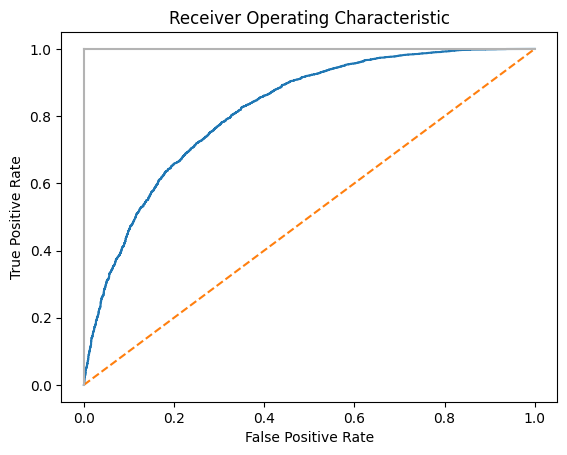

In [91]:
#Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0, 0], [1, 0], c='.7'), plt.plot([1, 1], c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [92]:
logit.predict_proba(X_test)[0:1]

array([[0.87195571, 0.12804429]])

In [93]:
logit.classes_

array([0., 1.])

In [95]:
#Calculate area under the curve
roc_auc_score(y_test, target_probabilities)

0.8166838471795779

In [96]:
# Create a classification report
from sklearn.metrics import classification_report
target_predicted = logit.predict(X_test)
print(classification_report(y_test,
                           target_predicted
                           ))

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73      3608
         1.0       0.72      0.76      0.74      3462

    accuracy                           0.73      7070
   macro avg       0.74      0.74      0.73      7070
weighted avg       0.74      0.73      0.73      7070



In [97]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
import time

In [121]:
def simple_grid_search(X_train, y_train, X_test, y_test, feature_engineering_pipeline):
    '''
    simple helper function to grid search an ExtraTreesClassifier model and
    print out a classification report for the best param set.
    Best here is defined as having the best cross-validated accuracy on the training set
    '''

    params = {  # some simple parameters to grid search
        'max_depth': [10, None],
        'n_estimators': [10, 50, 100, 500],
        'criterion': ['gini', 'entropy']
    }

    base_model = RandomForestClassifier()

    model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
    start_time = time.time()  # capture the start time
    if feature_engineering_pipeline:  # fit FE pipeline to training data and use it to transform test data
        parsed_x_train = feature_engineering_pipeline.fit(X_train, y_train)
        parsed_x_train = feature_engineering_pipeline.transform(X_train)
        parsed_x_test = feature_engineering_pipeline.transform(X_test)
    else:
        parsed_x_train = X_train
        parsed_x_test = X_test

    parse_time = time.time()
    print(f"Parsing took {(parse_time - start_time):.2f} seconds")

    model_grid_search.fit(parsed_x_train, y_train)
    fit_time = time.time()
    print(f"Training took {(fit_time - start_time):.2f} seconds")

    best_model = model_grid_search.best_estimator_

    print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")

    return best_model

In [103]:
def advanced_grid_search(x_train, y_train, x_test, y_test, ml_pipeline, params, cv=3, include_probas=False, is_regression=False):
    '''
    This helper function will grid search a machine learning pipeline with feature engineering included
    and print out a classification report for the best param set.
    Best here is defined as having the best cross-validated accuracy on the training set
    '''

    model_grid_search = GridSearchCV(ml_pipeline, param_grid=params, cv=cv, error_score=-1)
    start_time = time.time()  # capture the start time

    model_grid_search.fit(x_train, y_train)

    best_model = model_grid_search.best_estimator_

    y_preds = best_model.predict(x_test)

    if is_regression:
        rmse = np.sqrt(mean_squared_error(y_pred=y_preds, y_true=test_set['pct_change_eod']))
        print(f'RMSE: {rmse:.5f}')
    else:
        print(classification_report(y_true=y_test, y_pred=y_preds))
    print(f'Best params: {model_grid_search.best_params_}')
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")

    if include_probas:
        y_probas = best_model.predict_proba(x_test).max(axis=1)
        return best_model, y_preds, y_probas

    return best_model, y_preds

In [104]:
#making a pipeline
scaler = StandardScaler()
#putting numerical columns to scaler
num_transformer = make_pipeline(scaler)
preprocess = make_column_transformer((num_transformer, features))




pipe = Pipeline(('scaler', StandardScaler())
                       )


In [122]:
simple_grid_search(X_train, y_train, X_test, y_test, features)


Parsing took 0.03 seconds
Training took 358.51 seconds
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      3608
         1.0       0.72      0.79      0.75      3462

    accuracy                           0.75      7070
   macro avg       0.75      0.75      0.75      7070
weighted avg       0.75      0.75      0.75      7070

Overall took 359.08 seconds


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500)